# Catalogs

Medchem proposes a list of RDKit-based catalogs and Medchem-specific catalogs in order to quickly triage or flag compounds that contains molecular features provided by a given catalog.

The API is based on the RDKit catalog module `rdkit.Chem.rdfiltercatalog`.

??? warning:
    Avoid blindly applying Medchem filters; you may miss valuable compounds or allow toxins for your specific applications.


In [ ]:
%load_ext autoreload
%autoreload 2

In [14]:
import datamol as dm
import pandas as pd

import medchem as mc
from medchem.catalogs import NamedCatalogs
from medchem.catalogs import list_named_catalogs
from medchem.catalogs import catalog_from_smarts

## Use the existing catalogs

List all the available catalogs.

In [15]:
list_named_catalogs()

['tox',
 'pains',
 'pains_a',
 'pains_b',
 'pains_c',
 'nih',
 'zinc',
 'brenk',
 'dundee',
 'bms',
 'glaxo',
 'schembl',
 'mlsmr',
 'inpharmatica',
 'lint',
 'alarm_nmr',
 'alphascreen',
 'gst_hitters',
 'his_hitters',
 'luciferase',
 'dnabinder',
 'chelator',
 'hitters',
 'electrophilic',
 'carcinogen',
 'ld50_oral',
 'reactive_unstable_toxic',
 'skin',
 'toxicophore',
 'nibr',
 'bredt',
 'unstable_graph']

Retrieve a specific catalog as an RDKit catalog object.

In [16]:
catalog = NamedCatalogs.nibr()

catalog.GetNumEntries()

444

This catalog has 444 entries.

Now, let's load some molecules and check whether they match to the NIBR catalog.

In [17]:
data = dm.freesolv()
data = data.iloc[:50]

data["mol"] = data["smiles"].apply(dm.to_mol)

data["match_nibr_catalog"] = data["mol"].apply(catalog.HasMatch)

Pick a few to display.

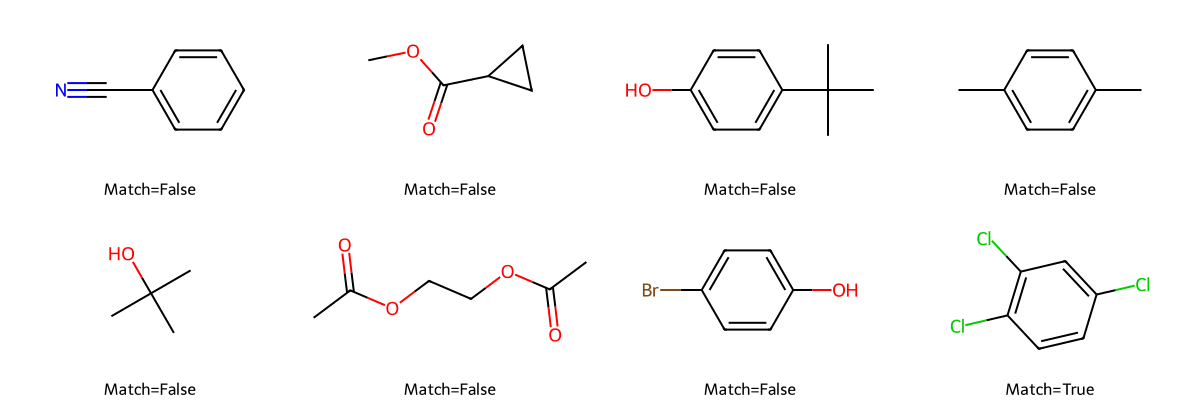

In [18]:
rows = data.sample(n=8, random_state=19)

mols = rows["mol"].tolist()
legends = rows["match_nibr_catalog"].apply(lambda x: f"Match={x}").tolist()

dm.to_image(mols, legends=legends, mol_size=(300, 200))

It's possible to retrieve the entries that match a certain molecule.

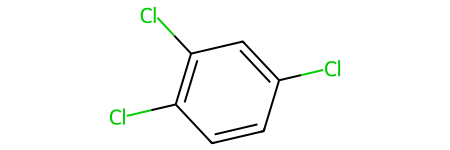

In [19]:
mol = dm.to_mol("c1cc(c(cc1Cl)Cl)Cl")

mol

In [20]:
matches = catalog.GetMatches(mol)
[m.GetDescription() for m in matches]

['NIBR||halogen_aromatic_count_3_min(3)||0||0||0',
 'NIBR||polyhalogenated_aromate_min(1)||1||0||0']

## Build your own catalog

In addition to the default list of `named catalogs`, you can also build your own catalog from a list of SMARTS. 

In [21]:
smarts_list = [
    ["HBA", "[!$([#6,F,Cl,Br,I,o,s,nX3,#7v5,#15v5,#16v4,#16v6,*+1,*+2,*+3])]"],
    ["Acid", "[CX3](=O)[OX1H0-,OX2H1]"],
    ["Macrocycle", "[r;!r3;!r4;!r5;!r6;!r7]"],
    ["Benzene", "[cR1]1[cR1][cR1][cR1][cR1][cR1]1"],
    ["Halogen", "[F,Cl,Br,I]"],
]

names, smarts = list(zip(*smarts_list))

We can create a new catalog object from the our list of smarts (and their descriptions/labels).

In [22]:
custom_catalog = catalog_from_smarts(
    smarts=smarts,
    labels=names,
    entry_as_inds=False,
)

Check how many entries.

In [23]:
custom_catalog.GetNumEntries()

5

You're good to use it!

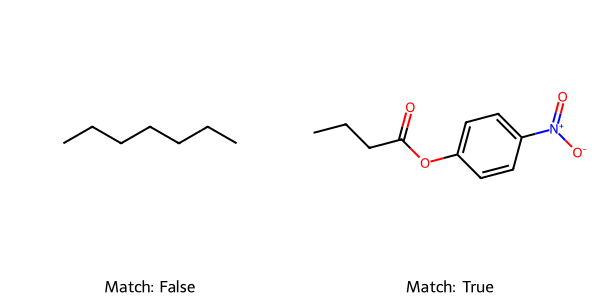

In [24]:
some_molecules = ["CCCCCCC", "CCCC(=O)OC1=CC=C(C=C1)N(=O)=O"]
mols = [dm.to_mol(x) for x in some_molecules]
matches = [custom_catalog.HasMatch(x) for x in mols]
dm.to_image(mols, legends=[f"Match: {x}" for x in matches])


---

-- The End :-)